In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

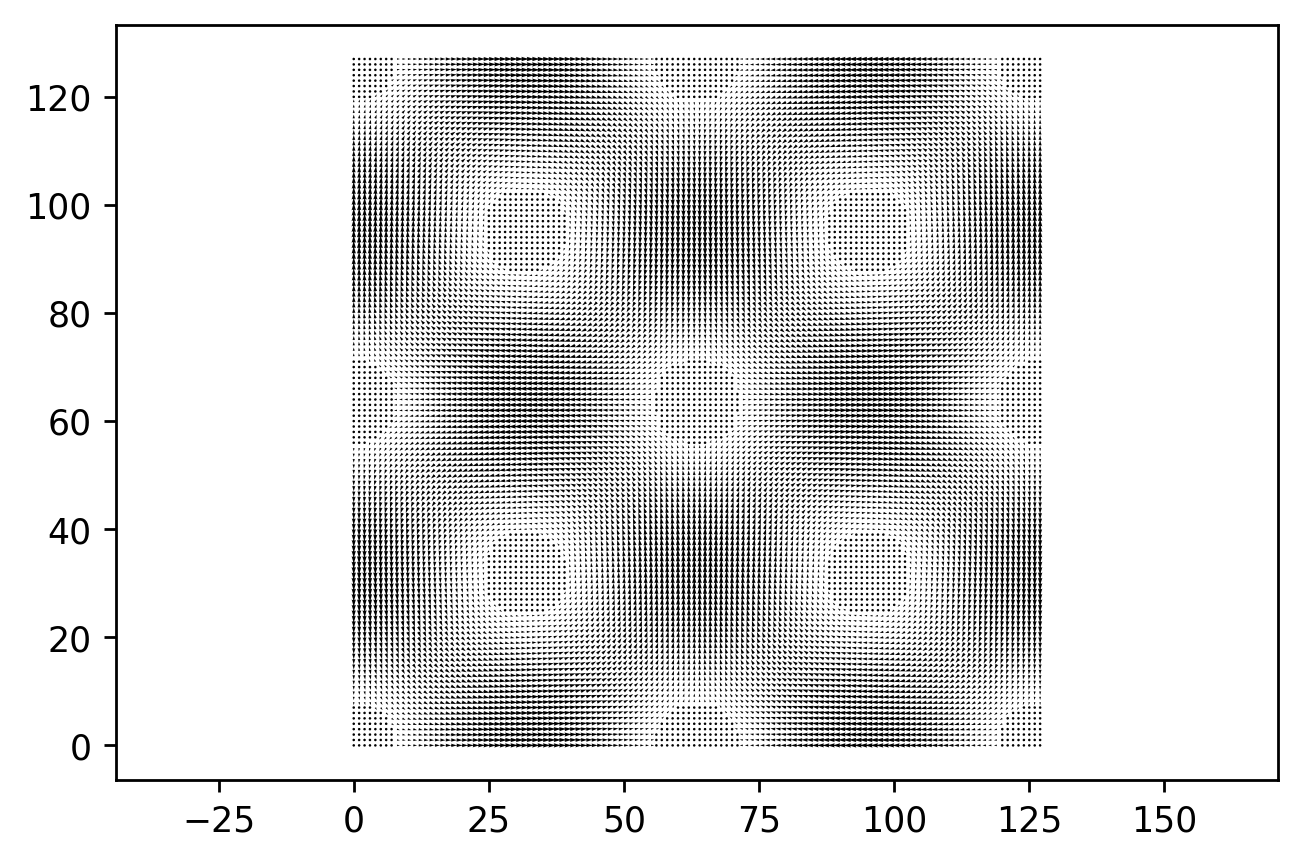

In [2]:
resolution = 128
x = np.linspace(0, 2*np.pi, resolution)
y = x[..., np.newaxis]

u =  0.2 * np.sin(x) * np.cos(y)
v = -0.2 * np.cos(x) * np.sin(y)
r =  np.ones_like(u)

types = np.ones_like(u, dtype=int)

# types[:,  0] = 1 << 2
# types[:, -1] = 1 << 2

# types[ 0, :] = 1 << 3
# types[-1, :] = 1 << 3

# types[ 0,  0] = 1 << 1
# types[-1, -1] = 1 << 1
# types[ 0, -1] = 1 << 1
# types[-1,  0] = 1 << 1

_, ax = plt.subplots(dpi=250)
ax.quiver(u, v)
ax.axis('equal')
plt.show()


In [7]:
initial = {
    'vel_x'  : u,
    'vel_y'  : v,
    'density': r
}

nx, ny = u.shape

meta = {
    'size_x': nx,
    'size_y': ny,
    'timesteps': 10000,
    'savestep': 1000
}

with h5py.File('taylor_green.h5', 'w') as file:
    group = file.create_group('initial')
    for name, data in initial.items():
        dataset = group.create_dataset(name, data.shape, dtype='f')
        dataset[...] = data

    group = file.create_group('layout')
    dataset = group.create_dataset('types', types.shape, dtype='i')
    dataset[...] = types

    for name, data in meta.items():
        group.attrs[name] = data
